In [1]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\USER\OneDrive - Amrita Vishwa Vidyapeetham\Documents\programing\python\tag\sem5\nasa_power_data_combined.csv",index_col=[0],parse_dates=[0])

In [3]:
data.head()

,Latitude,Longitude,ALLSKY_SFC_LW_DWN,CLRSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,...,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,PRECTOTCORR
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-01,13.219032,80.017639,-999.0,999.0,-999.0,-999.0,29.26,96.7,-999.0,-999.0,...,4.93,2.62,2.31,93.88,4.80,6.15,3.68,2.48,93.88,0.01
1984-01-02,13.219032,80.017639,-999.0,999.0,-999.0,-999.0,29.30,94.9,-999.0,-999.0,...,2.47,1.61,0.87,99.44,2.86,3.48,2.06,1.42,99.81,0.18
1984-01-03,13.219032,80.017639,-999.0,999.0,-999.0,-999.0,29.34,93.3,-999.0,-999.0,...,4.41,1.55,2.85,71.00,3.68,5.54,2.38,3.16,70.62,0.01
1984-01-04,13.219032,80.017639,-999.0,999.0,-999.0,-999.0,29.39,96.4,-999.0,-999.0,...,4.82,2.15,2.68,64.00,4.30,5.98,3.15,2.84,63.31,0.03
1984-01-05,13.219032,80.017639,-999.0,999.0,-999.0,-999.0,29.44,96.5,-999.0,-999.0,...,4.77,1.92,2.85,66.94,4.08,5.88,2.94,2.95,66.38,0.06


In [4]:
df=pd.read_csv(r"C:\Users\USER\OneDrive - Amrita Vishwa Vidyapeetham\Documents\programing\python\tag\sem5\nasa_power_data_combined.csv",parse_dates=[0])

In [5]:
df.sample(10)

,Date,Latitude,Longitude,ALLSKY_SFC_LW_DWN,CLRSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,...,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,PRECTOTCORR
15712,1987-01-06,12.719032,80.017639,-999.00,999.00,-999.00,-999.00,30.01,89.20,-999.00,...,4.94,2.27,2.66,55.38,4.54,6.07,3.20,2.88,54.69,0.03
23473,2008-04-06,12.719032,80.017639,405.53,401.60,26.27,6.20,37.69,139.37,143.26,...,4.30,1.95,2.36,85.25,3.70,5.34,2.73,2.62,85.62,0.19
4910,1997-06-11,13.219032,80.017639,438.30,421.60,-999.00,-999.00,37.85,79.70,-999.00,...,5.38,2.66,2.73,200.81,4.77,6.78,3.03,3.75,200.75,0.58
10768,2013-06-25,13.219032,80.017639,443.15,430.83,13.25,10.37,37.81,116.22,131.48,...,5.86,3.02,2.84,256.69,6.21,7.56,3.97,3.59,256.88,0.69
2701,1991-05-25,13.219032,80.017639,438.40,419.90,-999.00,-999.00,38.07,136.50,-999.00,...,5.30,1.23,4.09,160.94,4.90,6.71,1.51,5.20,160.69,0.01
25871,2014-10-30,12.719032,80.017639,405.04,398.54,15.65,9.14,32.98,107.42,114.04,...,5.41,4.12,1.29,14.81,5.93,6.75,5.30,1.45,14.44,0.11
4731,1996-12-14,13.219032,80.017639,425.90,404.60,-999.00,-999.00,29.11,53.30,-999.00,...,5.88,3.43,2.45,67.62,5.79,7.55,4.54,3.01,67.25,44.45
15739,1987-02-02,12.719032,80.017639,-999.00,999.00,-999.00,-999.00,32.27,114.30,-999.00,...,5.58,3.16,2.42,37.00,5.35,6.91,4.29,2.62,36.69,0.00
6579,2002-01-05,13.219032,80.017639,415.50,395.34,4.59,7.36,29.50,57.25,100.54,...,5.23,2.02,3.22,75.88,4.47,6.61,2.97,3.64,75.25,10.34
11961,2016-09-30,13.219032,80.017639,437.88,426.17,9.22,11.09,35.53,97.48,108.62,...,3.38,0.53,2.85,213.38,2.79,4.09,0.68,3.41,213.62,2.31


In [6]:
print(df.shape)
columns_to_drop = df.columns[(df == -999).any()]
df.drop(columns=columns_to_drop,inplace=True)
print(df.shape)

(29222, 35)
(29222, 27)


In [7]:
print(df.shape)
columns_to_drop = df.columns[(df == 999).any()]
df.drop(columns=columns_to_drop,inplace=True)
print(df.shape)

(29222, 27)
(29222, 26)


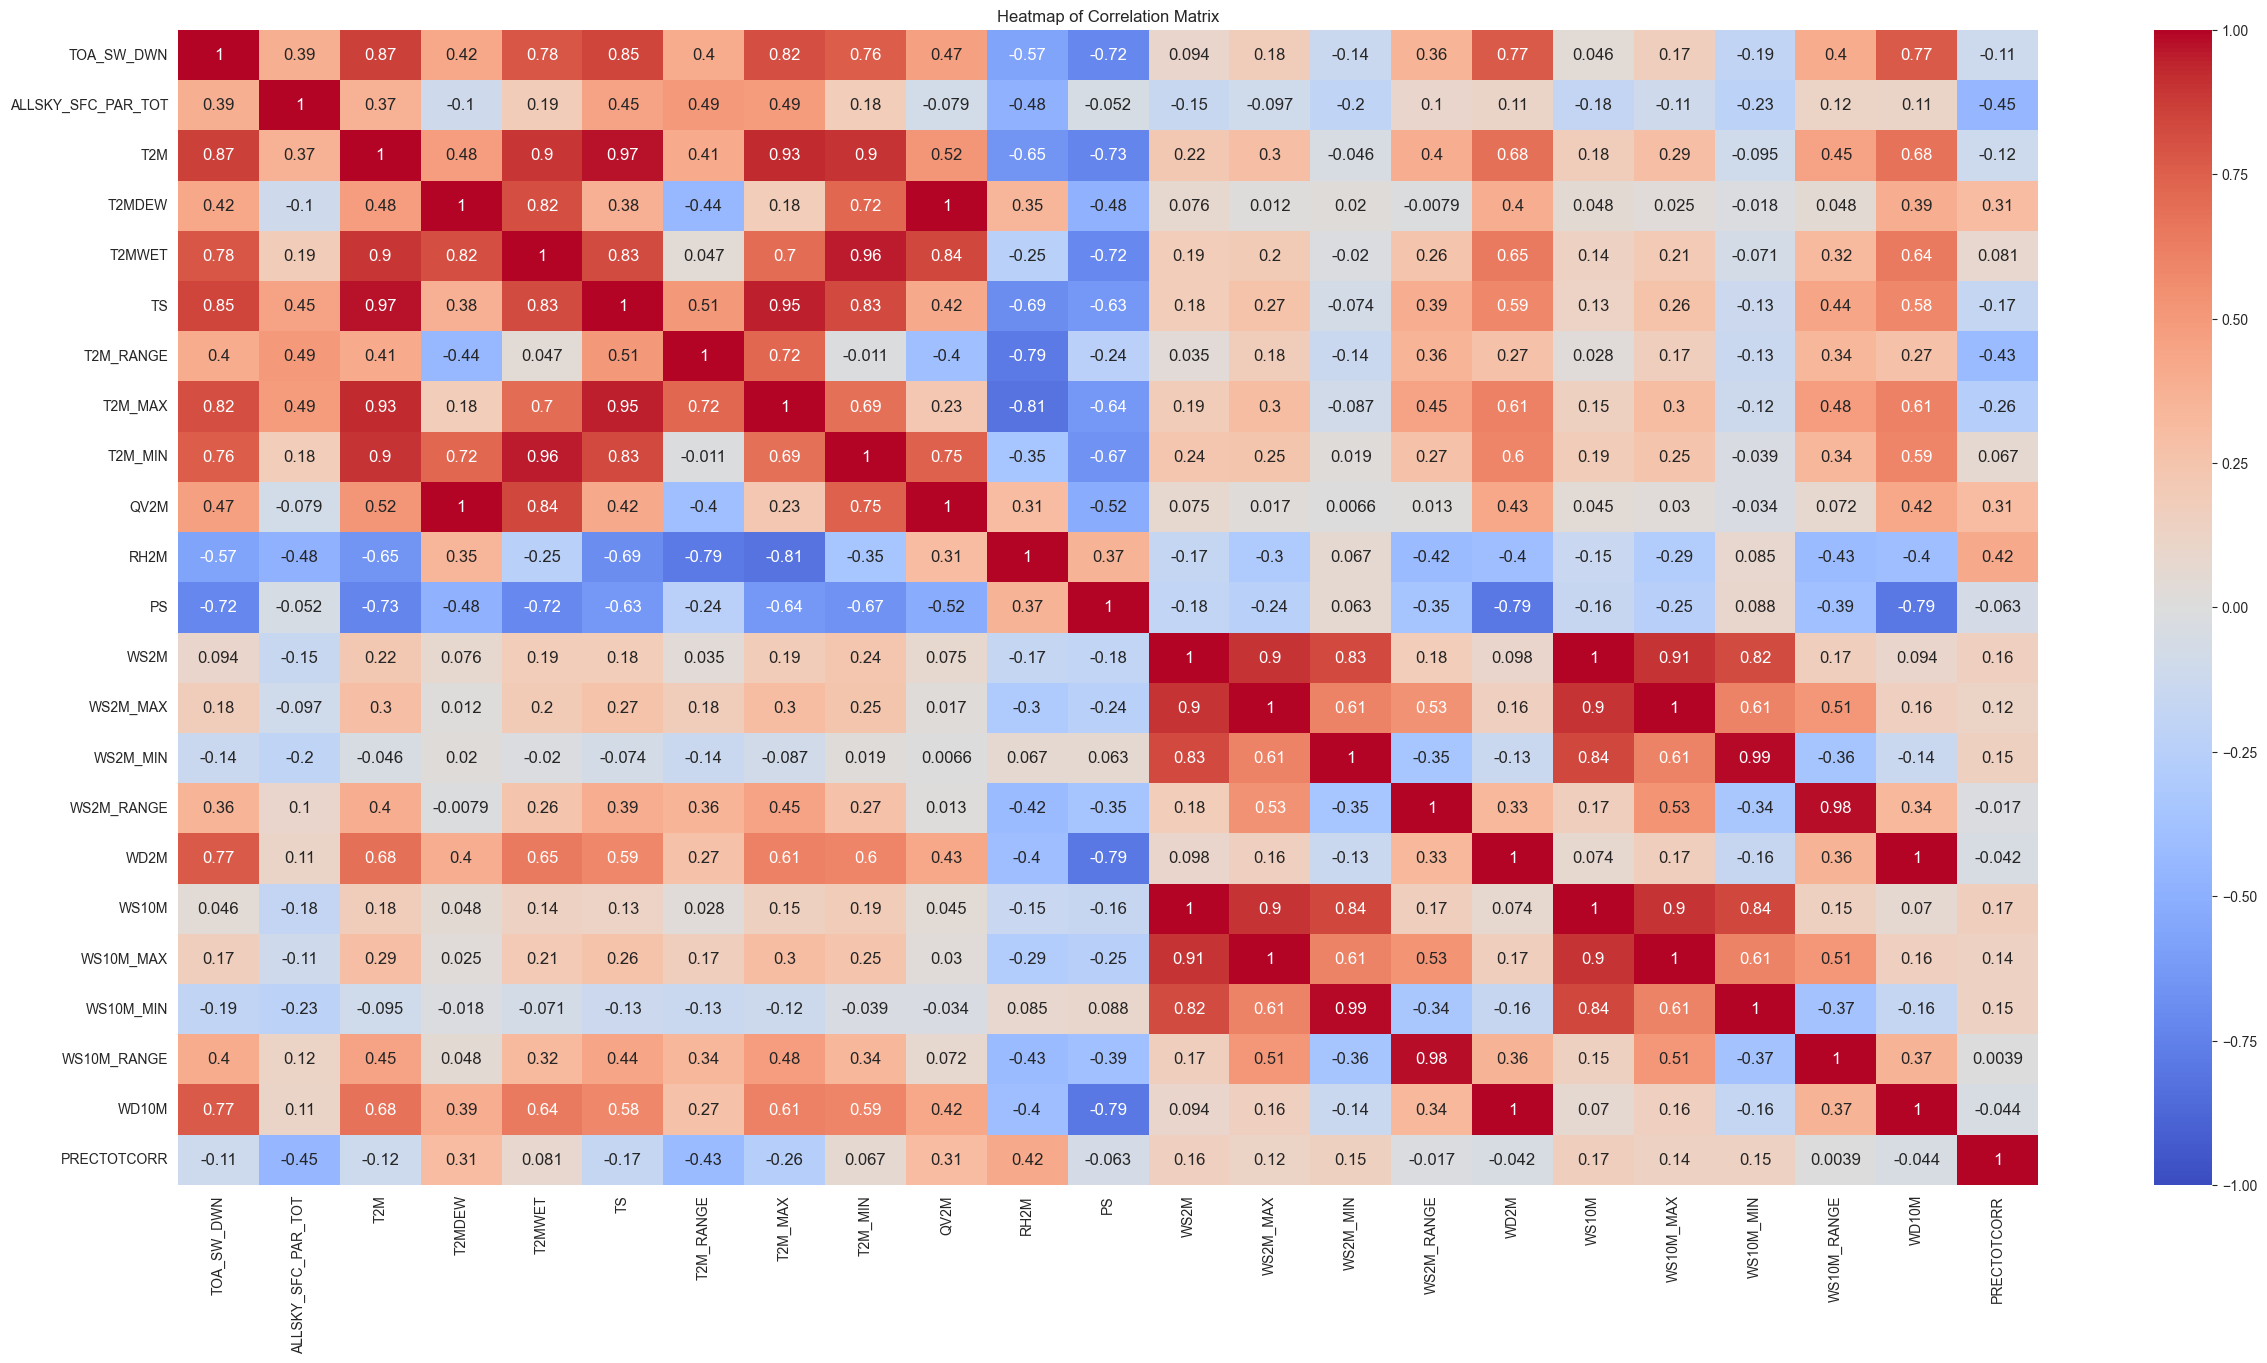

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(30,15))
corr_matrix = df.iloc[:,3:].corr()
# Plot the heatmap
sns.heatmap(corr_matrix, 
            annot=True,               # Add annotations (correlation values)
            cmap='coolwarm',          # Color map for the heatmap
            vmin=-1, vmax=1,          # Set the min and max correlation values
            annot_kws={"size": 12})   # Increase the font size of the annotations


plt.title('Heatmap of Correlation Matrix')
plt.show()

In [9]:
df.columns

Index(['Date', 'Latitude', 'Longitude', 'TOA_SW_DWN', 'ALLSKY_SFC_PAR_TOT',
       'T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN',
       'QV2M', 'RH2M', 'PS', 'WS2M', 'WS2M_MAX', 'WS2M_MIN', 'WS2M_RANGE',
       'WD2M', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WD10M',
       'PRECTOTCORR'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_9744\1401108737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_y.index, y=corr_with_y.values, palette='coolwarm')


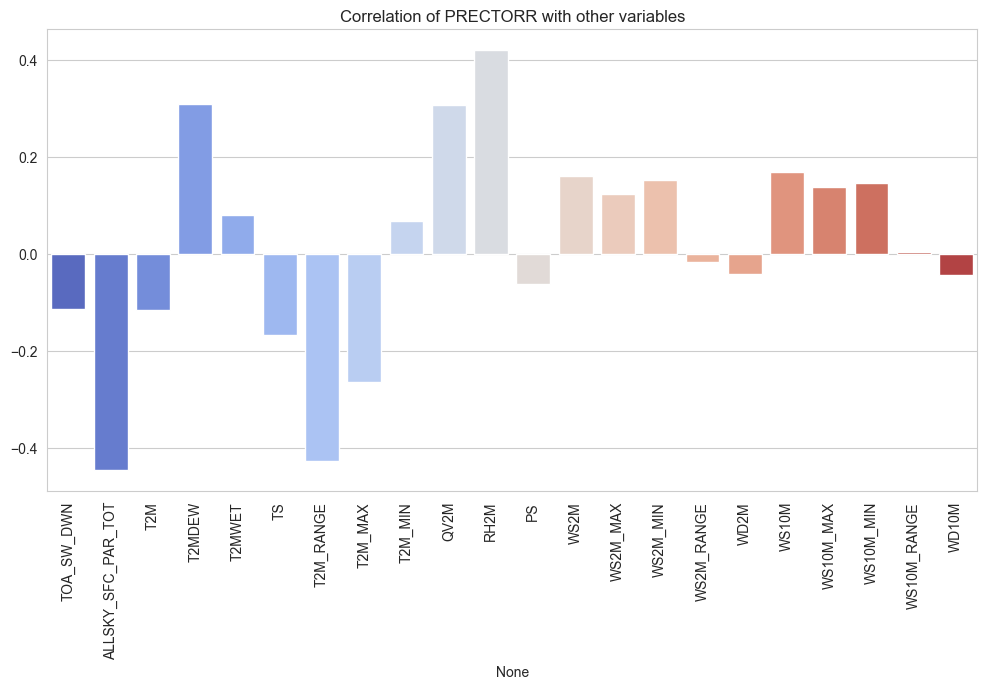

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

corr_with_y = corr_matrix['PRECTOTCORR'].drop('PRECTOTCORR')# Drop the self-correlation (y with y)

sns.barplot(x=corr_with_y.index, y=corr_with_y.values, palette='coolwarm')

plt.title('Correlation of PRECTORR with other variables')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [11]:
df.rename(columns={'Date':'ds','PRECTOTCORR':'y'},inplace = True)
data.rename(columns={'Date':'ds','PRECTOTCORR':'y'},inplace = True)
#data['ds'] = data['ds'].apply(lambda x: f"{x // 10000}-{(x % 10000) // 100:02d}-{x % 100:02d}")

In [12]:
df.describe()

,Latitude,Longitude,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,...,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,y
count,29222.000000,2.922200e+04,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000,...,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000,29222.000000
mean,12.969032,8.001764e+01,35.067026,104.766641,27.884037,22.084131,24.984084,28.700859,7.053843,31.874200,...,4.685581,1.859334,2.826247,154.555017,4.185150,5.868332,2.482473,3.385884,155.041397,3.379555
std,0.250004,2.140191e-11,3.108343,26.123579,2.529625,1.956875,1.933949,2.879144,2.420878,3.327547,...,1.137736,1.024768,0.963315,76.437556,1.216052,1.454491,1.343395,1.247002,76.620935,8.755208
min,12.719032,8.001764e+01,29.030000,4.300000,21.110000,13.830000,17.960000,21.150000,0.800000,22.980000,...,1.290000,0.010000,0.450000,6.810000,1.020000,1.570000,0.010000,0.510000,6.880000,0.000000
25%,12.719032,8.001764e+01,32.240000,90.800000,25.870000,20.920000,23.710000,26.440000,5.270000,28.890000,...,3.950000,1.090000,2.130000,75.620000,3.340000,4.910000,1.450000,2.490000,76.250000,0.010000
50%,12.969032,8.001764e+01,36.600000,109.445000,28.090000,22.500000,25.550000,28.750000,6.980000,31.880000,...,4.700000,1.800000,2.720000,165.280000,4.090000,5.850000,2.470000,3.230000,165.500000,0.310000
75%,13.219032,8.001764e+01,37.730000,124.200000,29.800000,23.580000,26.360000,30.750000,8.690000,34.450000,...,5.390000,2.500000,3.400000,223.190000,4.930000,6.760000,3.390000,4.120000,223.810000,2.640000
max,13.219032,8.001764e+01,38.240000,155.300000,35.330000,26.490000,29.110000,37.370000,17.480000,43.340000,...,13.990000,8.420000,9.820000,354.500000,14.750000,18.230000,11.020000,12.470000,353.940000,187.880000


In [13]:
data_g= df.groupby(['Latitude', 'Longitude'])

In [14]:
dg = data.groupby(['Latitude', 'Longitude'])

In [15]:
data_g

In [16]:
colors=sns.color_palette()
"""
for i,j in dg:
    j['y'].plot(style='.',figsize=(15,10),ms=1,color=colors[0],title="Rain")
plt.show()
"""

'\nfor i,j in dg:\n    j[\'y\'].plot(style=\'.\',figsize=(15,10),ms=1,color=colors[0],title="Rain")\nplt.show()\n'

<Axes: title={'center': 'Rain'}, xlabel='Date'>

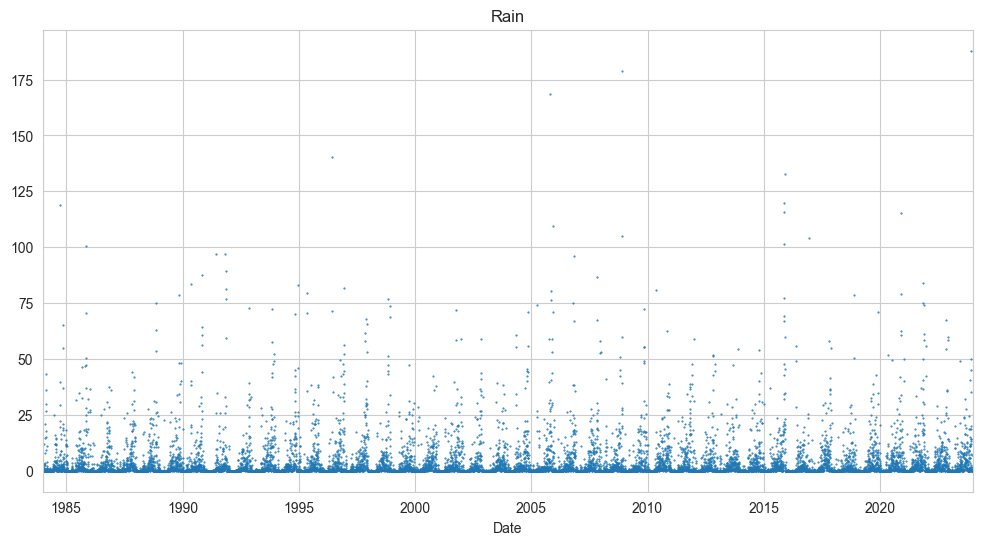

In [17]:
i,j=dg
j[1]['y'].plot(style='.',figsize=(12,6),ms=1,color=colors[0],title="Rain")

In [18]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday']=df['date'].dt.day_name()
    #df['weekday']=df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date_offset'] = (df.date.dt.month * 100 + df.date.dt.day - 320) % 1300
    df['season'] = pd.cut(df['date_offset'], 
                      [0, 300, 602, 900, 1300], 
                      labels=['Spring', 'Summer', 'Fall', 'Winter'])

    
    X = df[['dayofweek','weekday','quarter','month','year','dayofyear','dayofmonth','weekofyear','season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(data, label='y')

features_and_target = pd.concat([X, y], axis=1)

In [19]:
features_and_target.head(100)

,dayofweek,weekday,quarter,month,year,dayofyear,dayofmonth,weekofyear,season,y
Date,,,,,,,,,,
1984-01-01,6,Sunday,1,1,1984,1,1,52,Winter,0.01
1984-01-02,0,Monday,1,1,1984,2,2,1,Winter,0.18
1984-01-03,1,Tuesday,1,1,1984,3,3,1,Winter,0.01
1984-01-04,2,Wednesday,1,1,1984,4,4,1,Winter,0.03
1984-01-05,3,Thursday,1,1,1984,5,5,1,Winter,0.06
...,...,...,...,...,...,...,...,...,...,...
1984-04-05,3,Thursday,2,4,1984,96,5,14,Spring,0.30
1984-04-06,4,Friday,2,4,1984,97,6,14,Spring,0.11
1984-04-07,5,Saturday,2,4,1984,98,7,14,Spring,0.05


<Axes: xlabel='y', ylabel='season'>

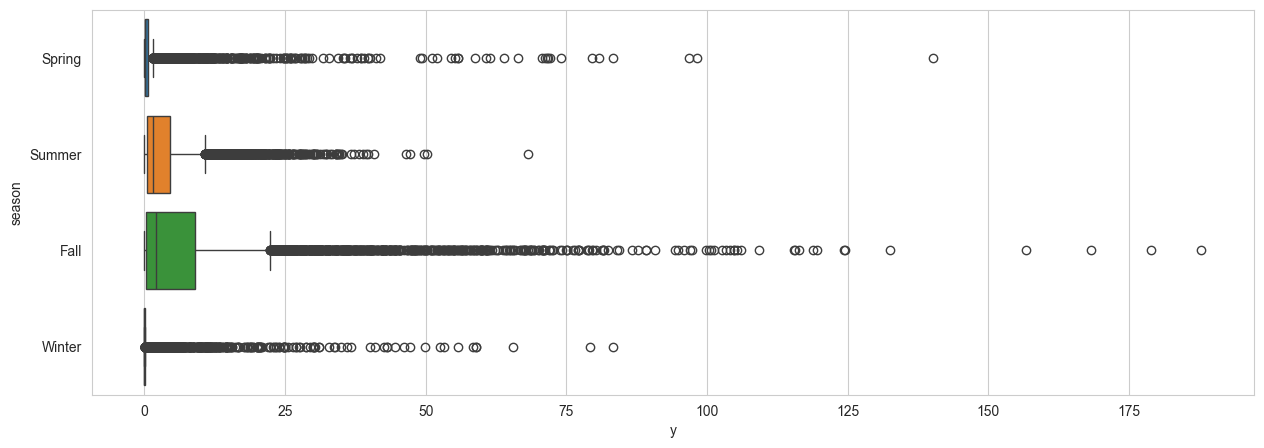

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=features_and_target.dropna(),
            x='y',
            y='season',
            hue='season',
            ax=ax,
            linewidth=1)

In [21]:
 #data_g: print(group.describe())

for name,group in data_g:
    print(group.describe())

In [22]:
def apply_prophet(train, test):
    model = Prophet(changepoint_prior_scale=0.25)#n_changepoints=40
    model.add_seasonality(name='yearly', period=365, fourier_order=10)
    # Add regressors
    for i in train.columns:
        if i not in ['ds', 'y', 'Latitude', 'Longitude']:
            model.add_regressor(i)#other parameters
    
    model.fit(train)

    # Create a future DataFrame for the test period
    future = test[['ds']].copy()  # Use the test dates
    
    # Add the regressors to the future DataFrame from the test data
    for i in train.columns:
        if i not in ['ds', 'y', 'Latitude', 'Longitude']:
            future[i] = test[i]
    
    forecast = model.predict(future)
    
    forecast['Latitude'] = test['Latitude'].iloc[0]
    forecast['Longitude'] = test['Longitude'].iloc[0]
    
    return forecast,model

In [23]:
def evaluate_forecast(forecast, actual):
    y_pred = forecast['yhat']
    y_true = actual['y']
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2=r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")

In [26]:
def FORCAST(data_g,x):
    forecasts = []
    split_date = '01-Jan-2021'

    for name, group in data_g:
        if x=='W' or x=='M' or  x=='4M' or  x=='6M':
            group = group.set_index('ds')
            group = group.resample(x).mean().reset_index()
        train_data = group.loc[group['ds'] <= split_date].copy()
        test_data = group.loc[group['ds'] > split_date].copy()
        
        forecast, m = apply_prophet(train_data, test_data)  # return both forecast and the model
        forecast['yhat'] = forecast['yhat'].apply(lambda x: max(x, 0))
        if x=='W':
            print("Weekly")
        elif x=='M':
            print("Monthly")
        elif x=='4M':
            print("4 Months")
        elif x=='6M':
            print("6 Months")
        else:
            print("Daily")
        evaluate_forecast(forecast, test_data)
        fig = m.plot(forecast)  # 'm' is the Prophet model
        #m.plot_components(forecasts)
        add_changepoints_to_plot(fig.gca(), m, forecast)# Add changepoints to the plot
        forecasts.append(forecast)
    plt.show()
    return forecasts

22:25:00 - cmdstanpy - INFO - Chain [1] start processing
22:25:08 - cmdstanpy - INFO - Chain [1] done processing


Daily
MAE: 3.342421794346637
MSE: 36.58319122607735
RMSE: 6.048404023052474
R2: 0.5205479689933056


22:25:11 - cmdstanpy - INFO - Chain [1] start processing
22:25:22 - cmdstanpy - INFO - Chain [1] done processing


Daily
MAE: 3.8984022552248647
MSE: 63.486709766065424
RMSE: 7.967854778173698
R2: 0.43256785380357854


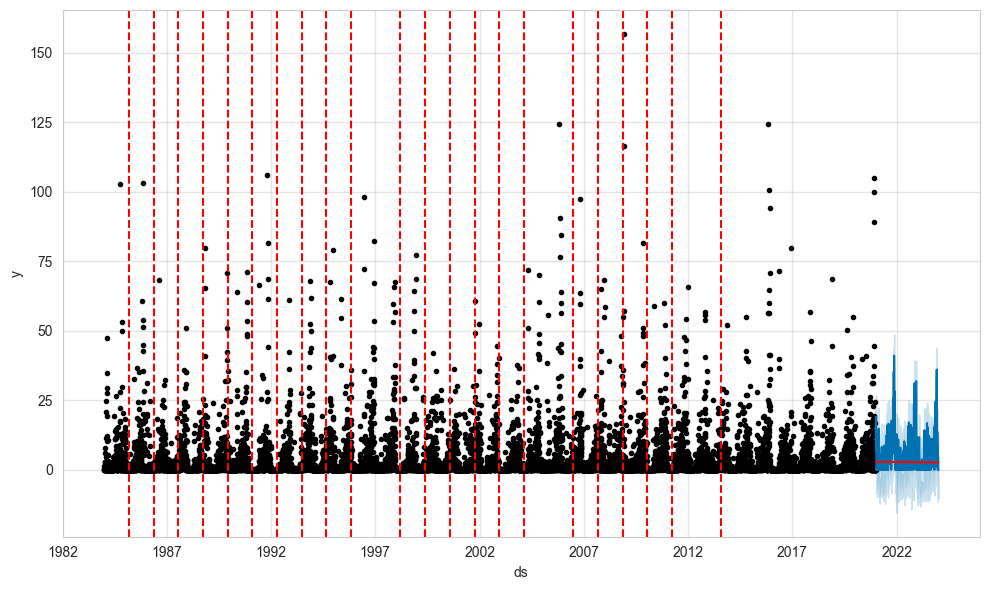

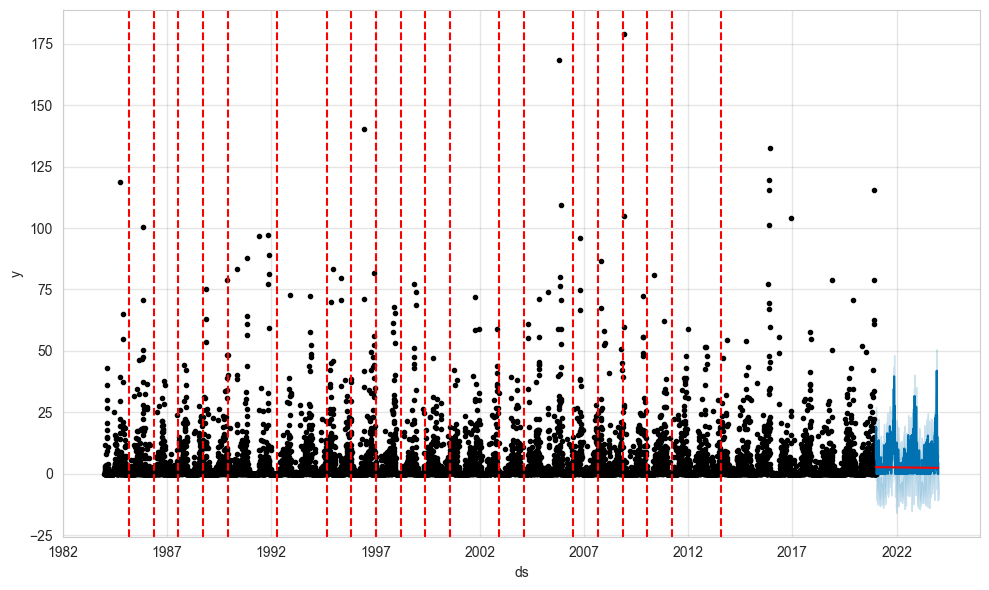

In [27]:
forecasts=FORCAST(data_g,'D')

22:25:24 - cmdstanpy - INFO - Chain [1] start processing
22:25:24 - cmdstanpy - INFO - Chain [1] done processing


Weekly
MAE: 2.0072706917688516
MSE: 7.941992528906242
RMSE: 2.818154099566992
R2: 0.7417260518523436


22:25:25 - cmdstanpy - INFO - Chain [1] start processing
22:25:26 - cmdstanpy - INFO - Chain [1] done processing


Weekly
MAE: 2.4297850007073327
MSE: 12.848207040343965
RMSE: 3.5844395713059476
R2: 0.6706328530933987


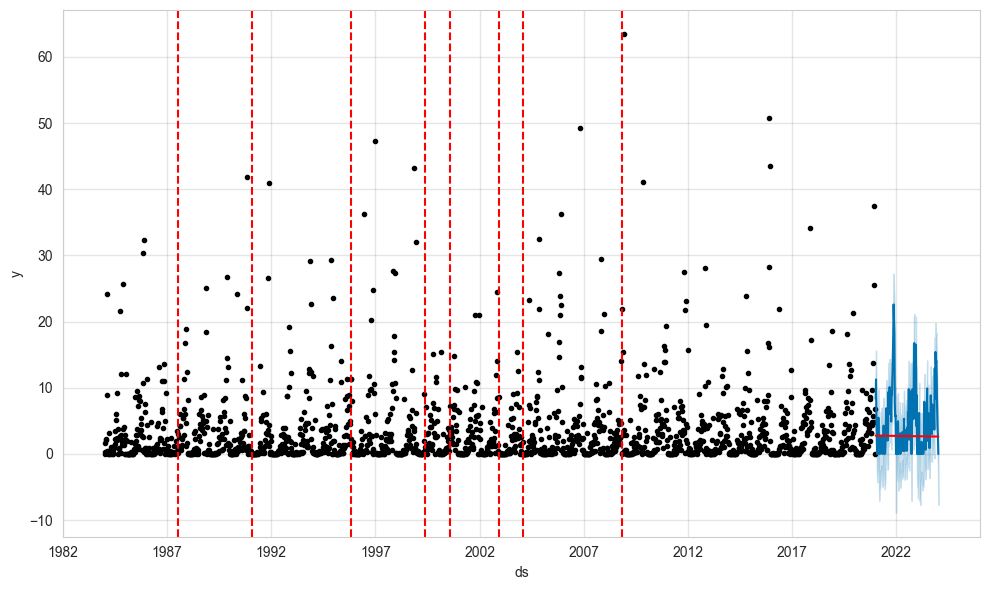

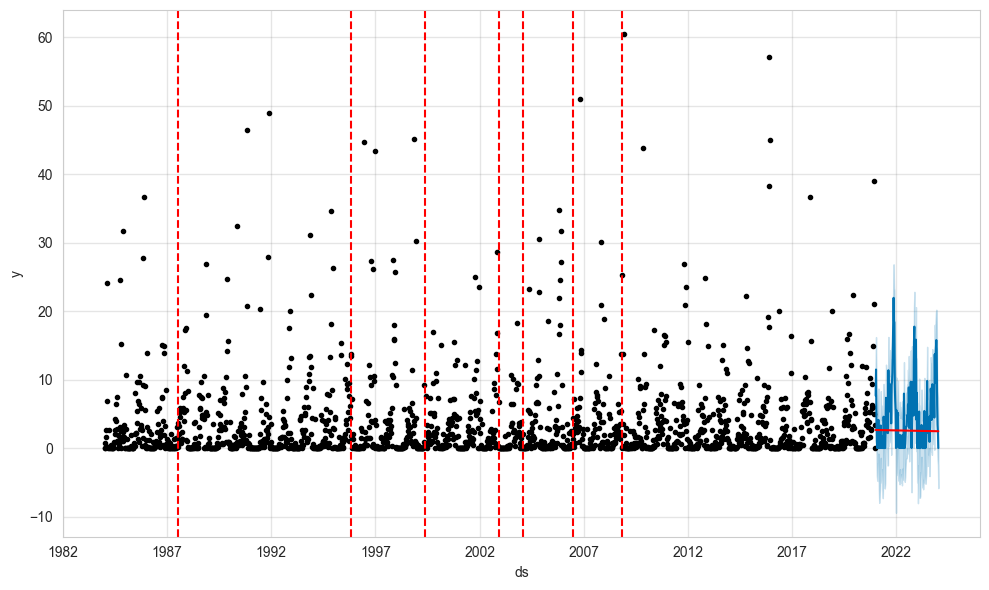

[            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
 0   2021-01-03  2.777700    3.862763   12.546026     2.777700     2.777700   
 1   2021-01-10  2.776794    6.929282   15.625503     2.776794     2.776794   
 2   2021-01-17  2.775888    1.242667    9.923356     2.775888     2.775888   
 3   2021-01-24  2.774982   -2.283606    6.195223     2.774982     2.774982   
 4   2021-01-31  2.774076   -4.265704    4.333759     2.774076     2.774076   
 ..         ...       ...         ...         ...          ...          ...   
 153 2023-12-10  2.639087    7.462495   15.748357     2.421447     2.914476   
 154 2023-12-17  2.638181    2.341274   11.349278     2.420675     2.917647   
 155 2023-12-24  2.637275    0.042620    8.163428     2.417608     2.920988   
 156 2023-12-31  2.636369   -1.770905    6.872616     2.414688     2.924403   
 157 2024-01-07  2.635464   -7.672968    1.219471     2.412501     2.927089   
 
      ALLSKY_SFC_PAR_TOT  ALLSKY_SFC_PAR_TOT_lower

In [28]:
FORCAST(data_g,'W')

22:25:27 - cmdstanpy - INFO - Chain [1] start processing
22:25:27 - cmdstanpy - INFO - Chain [1] done processing


Monthly
MAE: 1.143957457280595
MSE: 3.1710317357899984
RMSE: 1.7807390981808644
R2: 0.8435744542494423


22:25:27 - cmdstanpy - INFO - Chain [1] start processing
22:25:27 - cmdstanpy - INFO - Chain [1] done processing


Monthly
MAE: 1.2395510795965239
MSE: 4.099292279581686
RMSE: 2.0246709064886783
R2: 0.8147712947664505


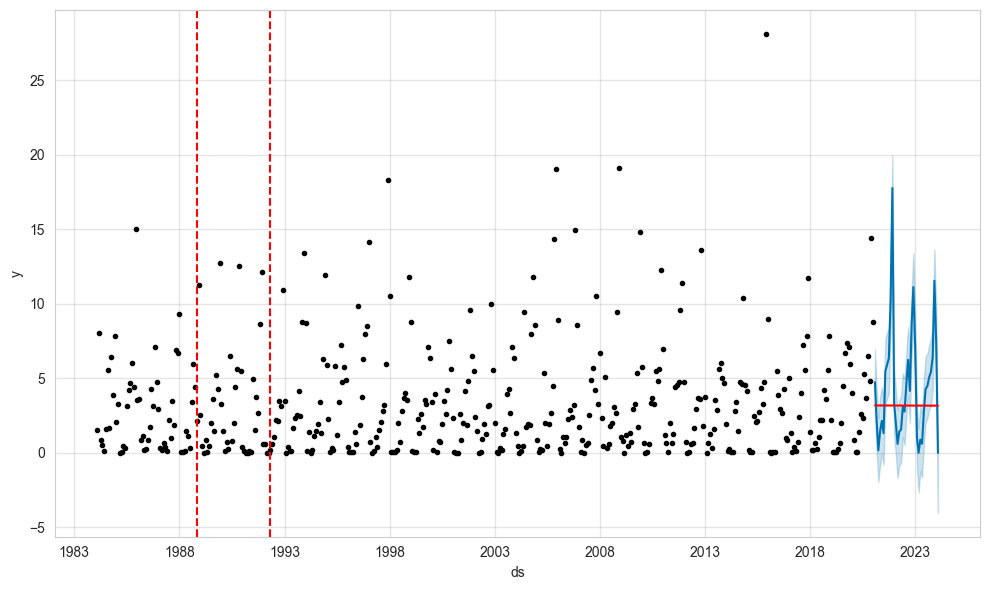

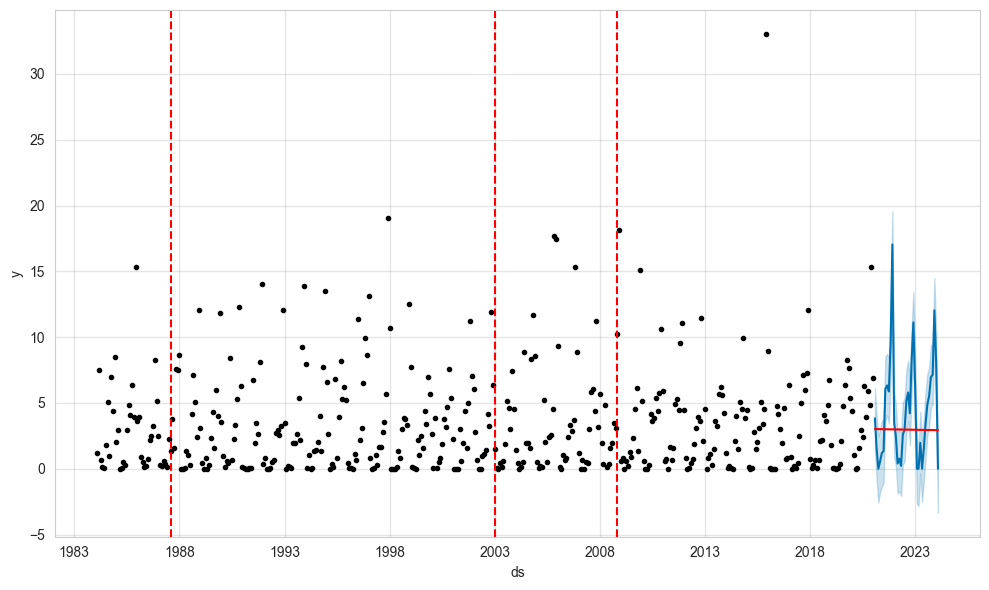

[           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
 0  2021-01-31  3.180010    2.585472    6.938949     3.180010     3.180010   
 1  2021-02-28  3.179634    0.182906    4.410505     3.179634     3.179634   
 2  2021-03-31  3.179217   -1.949453    2.314260     3.179217     3.179217   
 3  2021-04-30  3.178814   -0.836944    3.793403     3.178782     3.178856   
 4  2021-05-31  3.178398   -0.072965    4.384921     3.178293     3.178507   
 5  2021-06-30  3.177995   -0.806075    3.499633     3.177791     3.178199   
 6  2021-07-31  3.177578    3.199238    7.619605     3.177275     3.177885   
 7  2021-08-31  3.177162    3.658339    8.070117     3.176735     3.177638   
 8  2021-09-30  3.176759    4.030441    8.419813     3.176202     3.177391   
 9  2021-10-31  3.176342    8.182388   12.577744     3.175644     3.177094   
 10 2021-11-30  3.175939   15.674307   20.001453     3.175073     3.176830   
 11 2021-12-31  3.175523    1.215800    5.578854     3.174440   

In [29]:
FORCAST(data_g,'M')

22:25:29 - cmdstanpy - INFO - Chain [1] start processing
22:25:29 - cmdstanpy - INFO - Chain [1] done processing


4 Months
MAE: 0.801100004412211
MSE: 1.0779498111008636
RMSE: 1.0382436183771435
R2: 0.8559587375584319


22:25:29 - cmdstanpy - INFO - Chain [1] start processing
22:25:29 - cmdstanpy - INFO - Chain [1] done processing


4 Months
MAE: 0.8795136703891163
MSE: 1.2454768656568784
RMSE: 1.1160093483734257
R2: 0.8493075528107397


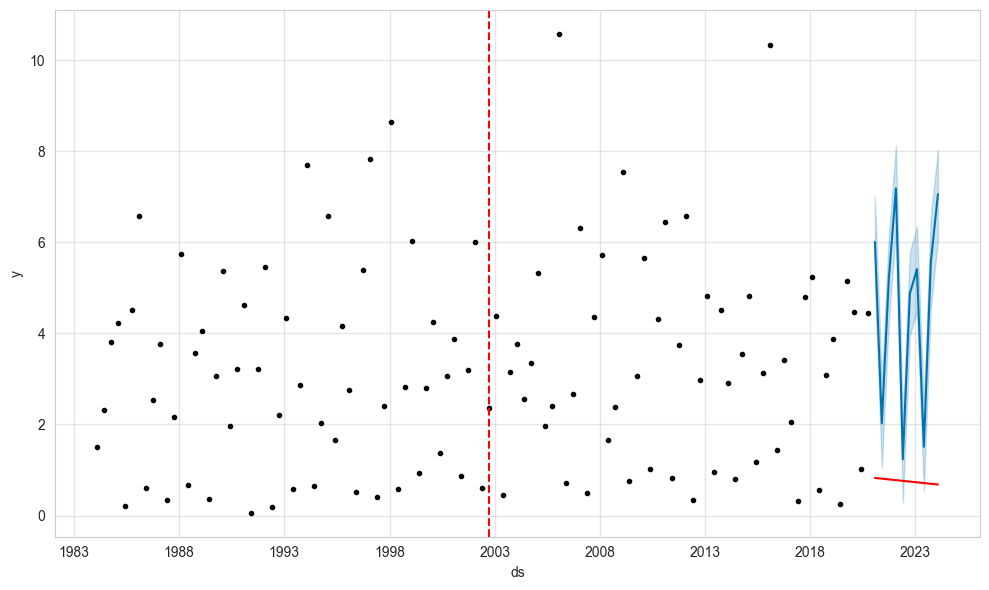

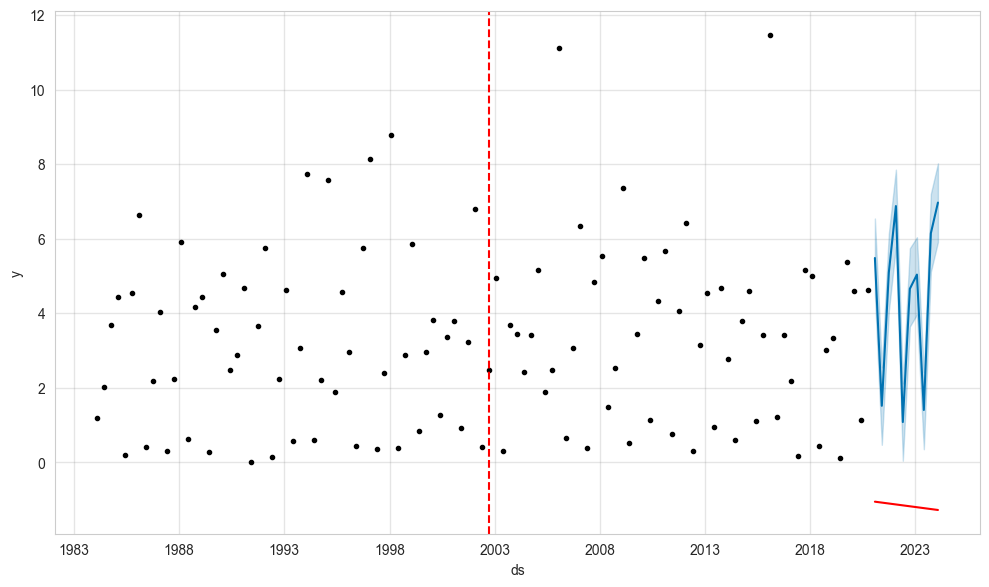

[          ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
 0 2021-01-31  0.825630    5.110614    7.008629     0.825623     0.825644   
 1 2021-05-31  0.809770    1.058723    2.955987     0.809699     0.809850   
 2 2021-09-30  0.793646    4.296148    6.144888     0.793476     0.793827   
 3 2022-01-31  0.777390    6.257809    8.124691     0.777083     0.777713   
 4 2022-05-31  0.761530    0.278114    2.147059     0.761063     0.762027   
 5 2022-09-30  0.745406    3.938140    5.787114     0.744744     0.746079   
 6 2023-01-31  0.729150    4.498118    6.352667     0.728302     0.730064   
 7 2023-05-31  0.713290    0.550891    2.459494     0.712209     0.714517   
 8 2023-09-30  0.697166    4.570277    6.590214     0.695829     0.698681   
 9 2024-01-31  0.680910    6.062163    8.034228     0.679367     0.682663   
 
    ALLSKY_SFC_PAR_TOT  ALLSKY_SFC_PAR_TOT_lower  ALLSKY_SFC_PAR_TOT_upper  \
 0            0.008965                  0.008965                  0.00896

In [30]:
FORCAST(data_g,'4M')

22:25:30 - cmdstanpy - INFO - Chain [1] start processing
22:25:31 - cmdstanpy - INFO - Chain [1] done processing


6 Months
MAE: 0.7795507244383263
MSE: 0.8087317056330161
RMSE: 0.8992951159841891
R2: 0.8472128395846538


22:25:31 - cmdstanpy - INFO - Chain [1] start processing
22:25:32 - cmdstanpy - INFO - Chain [1] done processing


6 Months
MAE: 0.9135406991029739
MSE: 1.0664441242662401
RMSE: 1.032687815492291
R2: 0.8177235289754436


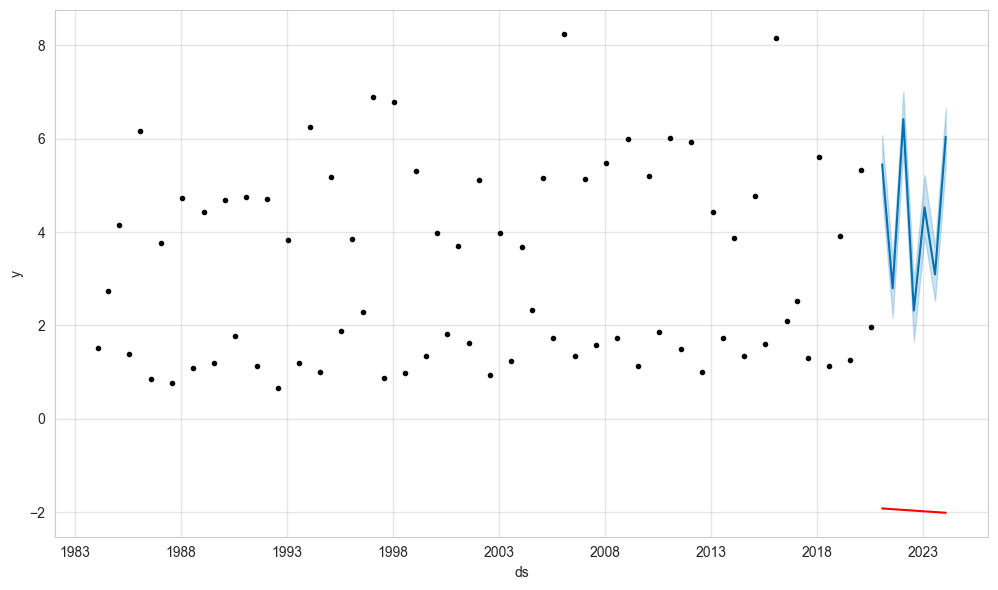

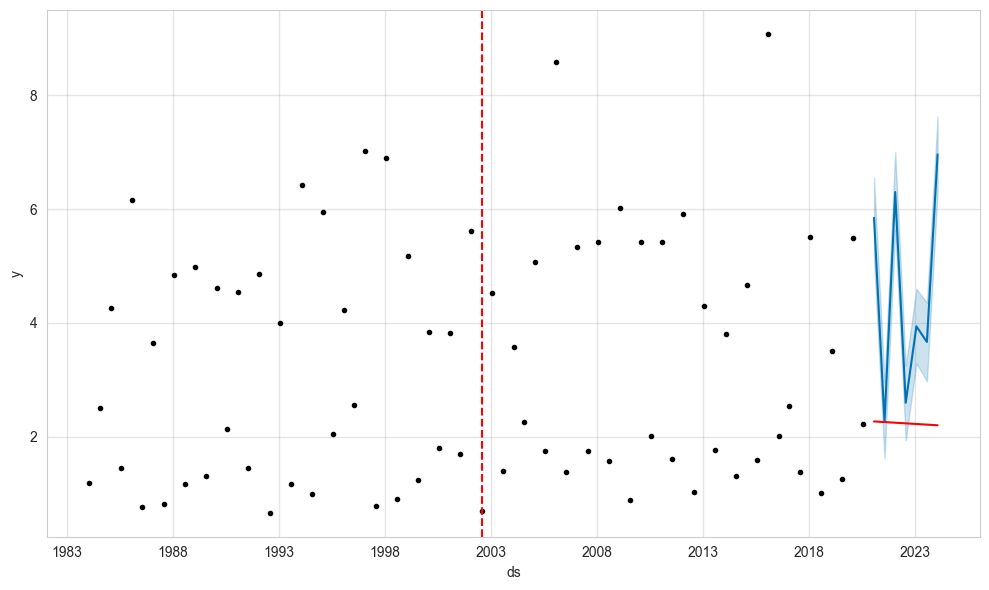

[          ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
 0 2021-01-31 -1.922533    4.822760    6.078187    -1.922535    -1.922531   
 1 2021-07-31 -1.937838    2.162046    3.407452    -1.937845    -1.937830   
 2 2022-01-31 -1.953397    5.737828    7.018044    -1.953414    -1.953378   
 3 2022-07-31 -1.968702    1.650673    2.923631    -1.968729    -1.968673   
 4 2023-01-31 -1.984261    3.910273    5.227908    -1.984303    -1.984221   
 5 2023-07-31 -1.999566    2.524915    3.686336    -1.999621    -1.999514   
 6 2024-01-31 -2.015125    5.417494    6.654213    -2.015194    -2.015060   
 
    ALLSKY_SFC_PAR_TOT  ALLSKY_SFC_PAR_TOT_lower  ALLSKY_SFC_PAR_TOT_upper  \
 0            0.590224                  0.590224                  0.590224   
 1           -0.256680                 -0.256680                 -0.256680   
 2            0.466708                  0.466708                  0.466708   
 3           -0.172684                 -0.172684                 -0.17

In [31]:
FORCAST(data_g,'6M')

In [32]:
def plt_predicted(x):
    specific_forecast = x[(x['Latitude'] == 13.219032) & (x['Longitude'] == 80.017639)]
    if 'ds' not in specific_forecast.columns:
        specific_forecast = specific_forecast.reset_index()
    plt.figure(figsize=(10, 6))
    plt.plot(specific_forecast['ds'], specific_forecast['yhat'], label='Forecast')
    plt.fill_between(specific_forecast['ds'], specific_forecast['yhat_lower'], specific_forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
    plt.title('Forecast for Latitude 13.219032, Longitude 80.017639')
    plt.xlabel('Date')
    plt.ylabel('Forecasted Rainfall')
    plt.legend()
    plt.show()

In [33]:
all_forecasts = pd.concat(forecasts, ignore_index=True)

In [34]:
weekly_forecasts = all_forecasts.resample('W', on='ds').mean()
monthly_forecasts = all_forecasts.resample('M', on='ds').mean()
six_monthly_forecasts = all_forecasts.resample('6M', on='ds').mean()

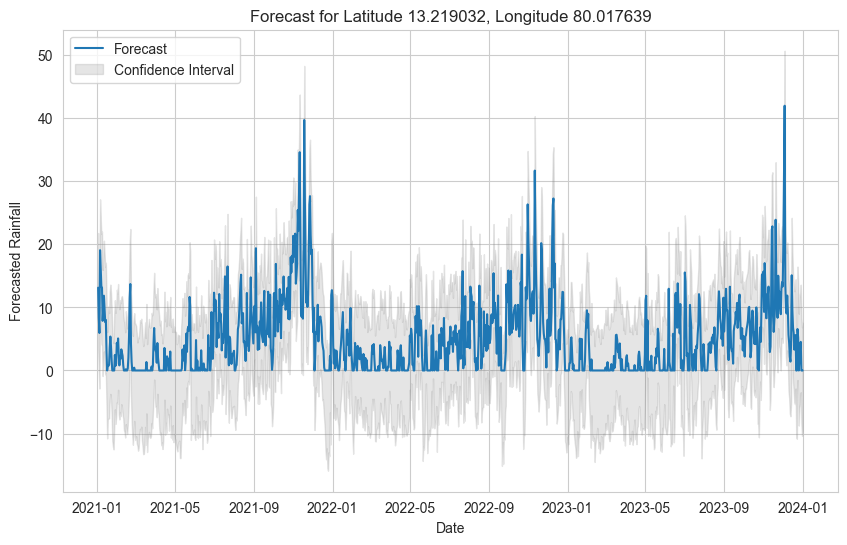

In [35]:
plt_predicted(all_forecasts)